In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

TF-Agents Environments

In [3]:
from tf_agents.environments import suite_gym

env = suite_gym.load("Breakout-v4")
env

C:\ProgramData\Anaconda3\envs\hands\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [4]:
env.gym

<TimeLimit<AtariEnv<Breakout-v4>>>

In [5]:
env.seed(42)
env.reset()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(0)})

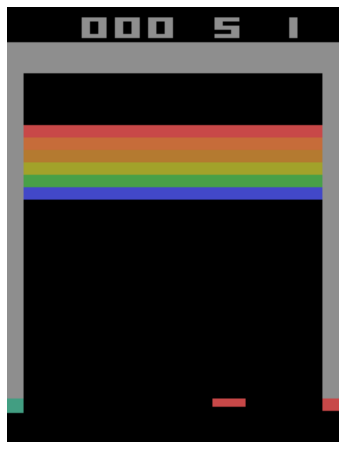

In [6]:
img = env.render(mode='rgb_array')

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
env.step(1) # Fire

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

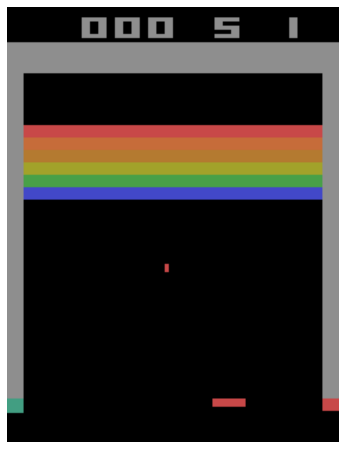

In [8]:
img = env.render(mode='rgb_array')

plt.figure(figsize=(6, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
env.current_time_step()

TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8),
 'reward': array(0., dtype=float32),
 'step_type': array(1)})

In [10]:
env.observation_spec()

BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255)

In [11]:
env.action_spec()

BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=3)

In [12]:
env.time_step_spec()

TimeStep(
{'discount': BoundedArraySpec(shape=(), dtype=dtype('float32'), name='discount', minimum=0.0, maximum=1.0),
 'observation': BoundedArraySpec(shape=(210, 160, 3), dtype=dtype('uint8'), name='observation', minimum=0, maximum=255),
 'reward': ArraySpec(shape=(), dtype=dtype('float32'), name='reward'),
 'step_type': ArraySpec(shape=(), dtype=dtype('int32'), name='step_type')})

In [13]:
env.gym.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT']

Environment Wrappers

In [14]:
from tf_agents.environments.wrappers import ActionRepeat

repeating_env = ActionRepeat(env, times=4)
repeating_env

In [15]:
repeating_env.unwrapped

In [16]:
import tf_agents.environments.wrappers

for name in dir(tf_agents.environments.wrappers):
    obj = getattr(tf_agents.environments.wrappers, name)
    if hasattr(obj, '__base__') and issubclass(obj, tf_agents.environments.wrappers.PyEnvironmentBaseWrapper):
        print('{:27s} {}'.format(name, obj.__doc__.split('\n')[0]))

ActionClipWrapper           Wraps an environment and clips actions to spec before applying.
ActionDiscretizeWrapper     Wraps an environment with continuous actions and discretizes them.
ActionOffsetWrapper         Offsets actions to be zero-based.
ActionRepeat                Repeates actions over n-steps while acummulating the received reward.
ExtraDisabledActionsWrapper Adds extra unavailable actions.
FixedLength                 Truncates long episodes and pads short episodes to have a fixed length.
FlattenActionWrapper        Flattens the action.
FlattenObservationsWrapper  Wraps an environment and flattens nested multi-dimensional observations.
GoalReplayEnvWrapper        Adds a goal to the observation, used for HER (Hindsight Experience Replay).
HistoryWrapper              Adds observation and action history to the environment's observations.
ObservationFilterWrapper    Filters observations based on an array of indexes.
OneHotActionWrapper         Converts discrete action to one_h

In [17]:
from functools import partial
from gym.wrappers import TimeLimit

limited_repeating_env = suite_gym.load(
    'Breakout-v4',
    gym_env_wrappers=[partial(TimeLimit, max_episode_steps=10000)],
    env_wrappers=[partial(ActionRepeat, times=4)],
)

In [18]:
limited_repeating_env

In [19]:
limited_repeating_env.unwrapped

In [20]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27000 # <=> 108k ALE frames since 1 step = 4 frames
environment_name = 'BreakoutNoFrameskip-v4'

class AtariPreprocessingWithAutoFire(AtariPreprocessing):
    def reset(self, **kwargs):
        obs = super().reset(**kwargs)
        super().step(1) # FIRE to start
        return obs
    def step(self, action):
        lives_before_action = self.ale.lives()
        obs, rewards, done, info = super().step(action)
        if self.ale.lives() < lives_before_action and not done:
            super().step(1) # FIRE to start after life lost
        return obs, rewards, done, info

env = suite_atari.load(
    environment_name,
    max_episode_steps=max_episode_steps,
    gym_env_wrappers=[AtariPreprocessingWithAutoFire, FrameStack4])

In [21]:
env

In [22]:
env.seed(42)
env.reset()
for _ in range(4):
    time_step = env.step(3) # LEFT

In [23]:
def plot_observation(obs):
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis('off')

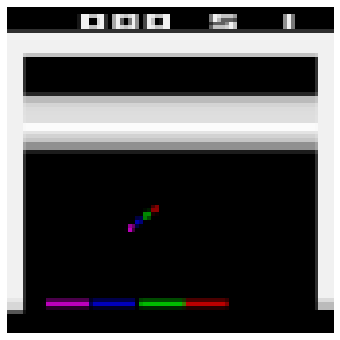

In [24]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
plt.show()

In [25]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment

tf_env = TFPyEnvironment(env)

Creating the DQN

In [26]:
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(
                          lambda obs: tf.cast(obs, np.float32) / 255.)
conv_layer_params=[(32, (8, 8), 4), (64, (4, 4), 2), (64, (3, 3), 1)]
fc_layer_params=[512]

q_net = QNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)

In [27]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4
optimizer = keras.optimizers.RMSprop(learning_rate=2.5e-4, rho=0.95, momentum=0.0,
                                     epsilon=0.00001, centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=250000 // update_period,
    end_learning_rate=0.01)
agent = DqnAgent(tf_env.time_step_spec(),
                 tf_env.action_spec(),
                 q_network=q_net,
                 optimizer=optimizer,
                 target_update_period=2000,
                 td_errors_loss_fn=keras.losses.Huber(reduction='none'),
                 gamma=0.99,
                 train_step_counter=train_step,
                 epsilon_greedy=lambda: epsilon_fn(train_step))
agent.initialize()

In [28]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=100000)

replay_buffer_observer = replay_buffer.add_batch

In [29]:
class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total
    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print(f'\r{self.counter}/{self.total}', end='')

In [30]:
from tf_agents.metrics import tf_metrics

train_metrics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric(),
]

In [31]:
train_metrics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [32]:
from tf_agents.eval.metric_utils import log_metrics
import logging

logging.getLogger().setLevel(logging.INFO)
log_metrics(train_metrics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


In [33]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(
    tf_env,
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=update_period) 

In [34]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(),
                                        tf_env.action_spec())
init_driver = DynamicStepDriver(
    tf_env,
    initial_collect_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20000)],
    num_steps=20000)
final_time_step, final_policy_state = init_driver.run()

20000/20000

In [35]:
tf.random.set_seed(9) 

trajectories, buffer_info = next(iter(replay_buffer.as_dataset(
    sample_batch_size=2,
    num_steps=3,
    single_deterministic_pass=False)))

Instructions for updating:
Use `tf.data.Dataset.scan(...) instead


Instructions for updating:
Use `tf.data.Dataset.scan(...) instead


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [36]:
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [37]:
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

In [38]:
from tf_agents.trajectories.trajectory import to_transition

time_steps, action_steps, next_time_steps = to_transition(trajectories)
time_steps.observation.shape

TensorShape([2, 2, 84, 84, 4])

In [39]:
trajectories.step_type.numpy()

array([[1, 1, 1],
       [1, 1, 1]])

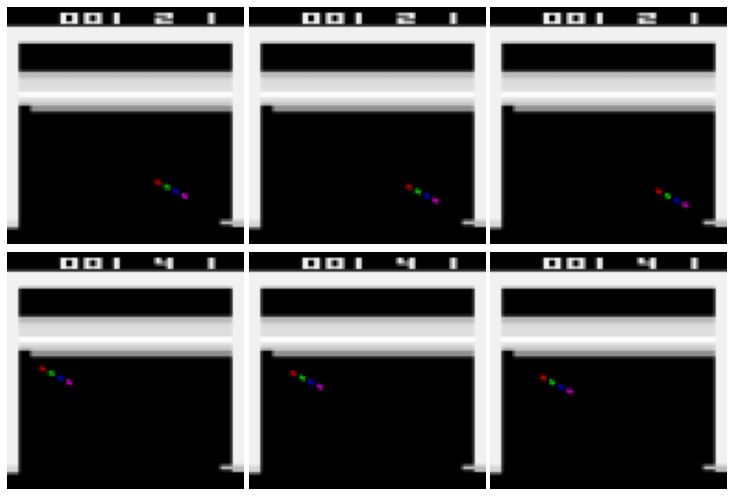

In [40]:
plt.figure(figsize=(10, 6.8))
for row in range(2):
    for col in range(3):
        plt.subplot(2, 3, row * 3 + col + 1)
        plot_observation(trajectories.observation[row, col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
plt.show()

In [41]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3).prefetch(3)

In [42]:
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

In [43]:
def train_agent(n_iterations):
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)
    for iteration in range(n_iterations):
        time_step, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        print(f'\r{iteration}/{n_iterations} loss:{train_loss.loss.numpy():.5f}', end='')
        if iteration % 1000 == 0:
            log_metrics(train_metrics)

In [44]:
train_agent(n_iterations=100000)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 4
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


996/100000 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 27
		 EnvironmentSteps = 4004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 151.8000030517578


1997/100000 loss:0.00041

INFO:absl: 
		 NumberOfEpisodes = 51
		 EnvironmentSteps = 8004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 176.3000030517578


3000/100000 loss:0.00060

INFO:absl: 
		 NumberOfEpisodes = 75
		 EnvironmentSteps = 12004
		 AverageReturn = 0.6000000238418579
		 AverageEpisodeLength = 194.0


3995/100000 loss:0.00026

INFO:absl: 
		 NumberOfEpisodes = 97
		 EnvironmentSteps = 16004
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 194.60000610351562


4997/100000 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 119
		 EnvironmentSteps = 20004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 189.8000030517578


5997/100000 loss:0.00002

INFO:absl: 
		 NumberOfEpisodes = 143
		 EnvironmentSteps = 24004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 159.10000610351562


6996/100000 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 165
		 EnvironmentSteps = 28004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 174.39999389648438


7997/100000 loss:0.00004

INFO:absl: 
		 NumberOfEpisodes = 188
		 EnvironmentSteps = 32004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 153.10000610351562


9000/100000 loss:0.00006

INFO:absl: 
		 NumberOfEpisodes = 212
		 EnvironmentSteps = 36004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 142.39999389648438


9997/100000 loss:0.00005

INFO:absl: 
		 NumberOfEpisodes = 237
		 EnvironmentSteps = 40004
		 AverageReturn = 0.699999988079071
		 AverageEpisodeLength = 144.3000030517578


10998/100000 loss:0.00064

INFO:absl: 
		 NumberOfEpisodes = 263
		 EnvironmentSteps = 44004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 154.60000610351562


11995/100000 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 282
		 EnvironmentSteps = 48004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 177.1999969482422


12997/100000 loss:0.00007

INFO:absl: 
		 NumberOfEpisodes = 305
		 EnvironmentSteps = 52004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 169.8000030517578


13997/100000 loss:0.00043

INFO:absl: 
		 NumberOfEpisodes = 327
		 EnvironmentSteps = 56004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 174.0


15000/100000 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 352
		 EnvironmentSteps = 60004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 168.3000030517578


15999/100000 loss:0.00025

INFO:absl: 
		 NumberOfEpisodes = 372
		 EnvironmentSteps = 64004
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 175.1999969482422


16995/100000 loss:0.00014

INFO:absl: 
		 NumberOfEpisodes = 396
		 EnvironmentSteps = 68004
		 AverageReturn = 1.0
		 AverageEpisodeLength = 196.39999389648438


17999/100000 loss:0.00003

INFO:absl: 
		 NumberOfEpisodes = 420
		 EnvironmentSteps = 72004
		 AverageReturn = 1.2999999523162842
		 AverageEpisodeLength = 164.10000610351562


18999/100000 loss:0.00017

INFO:absl: 
		 NumberOfEpisodes = 440
		 EnvironmentSteps = 76004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 194.89999389648438


19995/100000 loss:0.00024

INFO:absl: 
		 NumberOfEpisodes = 463
		 EnvironmentSteps = 80004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 160.39999389648438


20994/100000 loss:0.00014

INFO:absl: 
		 NumberOfEpisodes = 480
		 EnvironmentSteps = 84004
		 AverageReturn = 3.799999952316284
		 AverageEpisodeLength = 275.6000061035156


21997/100000 loss:0.00025

INFO:absl: 
		 NumberOfEpisodes = 502
		 EnvironmentSteps = 88004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 156.1999969482422


22997/100000 loss:0.00012

INFO:absl: 
		 NumberOfEpisodes = 520
		 EnvironmentSteps = 92004
		 AverageReturn = 0.8999999761581421
		 AverageEpisodeLength = 224.6999969482422


23999/100000 loss:0.00059

INFO:absl: 
		 NumberOfEpisodes = 542
		 EnvironmentSteps = 96004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 154.5


24999/100000 loss:0.00021

INFO:absl: 
		 NumberOfEpisodes = 562
		 EnvironmentSteps = 100004
		 AverageReturn = 2.299999952316284
		 AverageEpisodeLength = 245.8000030517578


25998/100000 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 584
		 EnvironmentSteps = 104004
		 AverageReturn = 0.800000011920929
		 AverageEpisodeLength = 185.39999389648438


26995/100000 loss:0.00082

INFO:absl: 
		 NumberOfEpisodes = 603
		 EnvironmentSteps = 108004
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 212.60000610351562


27999/100000 loss:0.00008

INFO:absl: 
		 NumberOfEpisodes = 625
		 EnvironmentSteps = 112004
		 AverageReturn = 1.100000023841858
		 AverageEpisodeLength = 189.0


28998/100000 loss:0.00022

INFO:absl: 
		 NumberOfEpisodes = 643
		 EnvironmentSteps = 116004
		 AverageReturn = 2.0
		 AverageEpisodeLength = 208.60000610351562


29999/100000 loss:0.00013

INFO:absl: 
		 NumberOfEpisodes = 664
		 EnvironmentSteps = 120004
		 AverageReturn = 1.600000023841858
		 AverageEpisodeLength = 173.89999389648438


30996/100000 loss:0.00022

INFO:absl: 
		 NumberOfEpisodes = 685
		 EnvironmentSteps = 124004
		 AverageReturn = 2.0
		 AverageEpisodeLength = 183.89999389648438


31999/100000 loss:0.00009

INFO:absl: 
		 NumberOfEpisodes = 705
		 EnvironmentSteps = 128004
		 AverageReturn = 2.4000000953674316
		 AverageEpisodeLength = 188.3000030517578


32997/100000 loss:0.00054

INFO:absl: 
		 NumberOfEpisodes = 725
		 EnvironmentSteps = 132004
		 AverageReturn = 2.799999952316284
		 AverageEpisodeLength = 220.6999969482422


33997/100000 loss:0.00047

INFO:absl: 
		 NumberOfEpisodes = 744
		 EnvironmentSteps = 136004
		 AverageReturn = 1.899999976158142
		 AverageEpisodeLength = 195.5


34999/100000 loss:0.00013

INFO:absl: 
		 NumberOfEpisodes = 760
		 EnvironmentSteps = 140004
		 AverageReturn = 2.799999952316284
		 AverageEpisodeLength = 235.39999389648438


35997/100000 loss:0.00045

INFO:absl: 
		 NumberOfEpisodes = 781
		 EnvironmentSteps = 144004
		 AverageReturn = 1.399999976158142
		 AverageEpisodeLength = 163.5


36995/100000 loss:0.00053

INFO:absl: 
		 NumberOfEpisodes = 800
		 EnvironmentSteps = 148004
		 AverageReturn = 2.4000000953674316
		 AverageEpisodeLength = 204.3000030517578


37998/100000 loss:0.00026

INFO:absl: 
		 NumberOfEpisodes = 819
		 EnvironmentSteps = 152004
		 AverageReturn = 1.2000000476837158
		 AverageEpisodeLength = 218.89999389648438


38998/100000 loss:0.00208

INFO:absl: 
		 NumberOfEpisodes = 836
		 EnvironmentSteps = 156004
		 AverageReturn = 3.0
		 AverageEpisodeLength = 270.70001220703125


39998/100000 loss:0.00018

INFO:absl: 
		 NumberOfEpisodes = 851
		 EnvironmentSteps = 160004
		 AverageReturn = 2.700000047683716
		 AverageEpisodeLength = 249.5


40998/100000 loss:0.00034

INFO:absl: 
		 NumberOfEpisodes = 867
		 EnvironmentSteps = 164004
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 239.39999389648438


41999/100000 loss:0.00036

INFO:absl: 
		 NumberOfEpisodes = 883
		 EnvironmentSteps = 168004
		 AverageReturn = 5.400000095367432
		 AverageEpisodeLength = 271.3999938964844


42995/100000 loss:0.00074

INFO:absl: 
		 NumberOfEpisodes = 898
		 EnvironmentSteps = 172004
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 266.20001220703125


43995/100000 loss:0.00020

INFO:absl: 
		 NumberOfEpisodes = 913
		 EnvironmentSteps = 176004
		 AverageReturn = 3.0
		 AverageEpisodeLength = 248.3000030517578


44998/100000 loss:0.00035

INFO:absl: 
		 NumberOfEpisodes = 926
		 EnvironmentSteps = 180004
		 AverageReturn = 5.300000190734863
		 AverageEpisodeLength = 308.5


46000/100000 loss:0.00638

INFO:absl: 
		 NumberOfEpisodes = 938
		 EnvironmentSteps = 184004
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 321.0


46997/100000 loss:0.00090

INFO:absl: 
		 NumberOfEpisodes = 951
		 EnvironmentSteps = 188004
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 288.29998779296875


48000/100000 loss:0.02279

INFO:absl: 
		 NumberOfEpisodes = 966
		 EnvironmentSteps = 192004
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 237.0


48999/100000 loss:0.00386

INFO:absl: 
		 NumberOfEpisodes = 976
		 EnvironmentSteps = 196004
		 AverageReturn = 5.800000190734863
		 AverageEpisodeLength = 419.20001220703125


49999/100000 loss:0.00071

INFO:absl: 
		 NumberOfEpisodes = 987
		 EnvironmentSteps = 200004
		 AverageReturn = 7.599999904632568
		 AverageEpisodeLength = 377.0


50995/100000 loss:0.00128

INFO:absl: 
		 NumberOfEpisodes = 999
		 EnvironmentSteps = 204004
		 AverageReturn = 8.399999618530273
		 AverageEpisodeLength = 333.8999938964844


51999/100000 loss:0.00048

INFO:absl: 
		 NumberOfEpisodes = 1006
		 EnvironmentSteps = 208004
		 AverageReturn = 9.899999618530273
		 AverageEpisodeLength = 475.5


52994/100000 loss:0.00168

INFO:absl: 
		 NumberOfEpisodes = 1014
		 EnvironmentSteps = 212004
		 AverageReturn = 11.100000381469727
		 AverageEpisodeLength = 534.5


53998/100000 loss:0.00142

INFO:absl: 
		 NumberOfEpisodes = 1021
		 EnvironmentSteps = 216004
		 AverageReturn = 12.800000190734863
		 AverageEpisodeLength = 550.7999877929688


54996/100000 loss:0.00262

INFO:absl: 
		 NumberOfEpisodes = 1028
		 EnvironmentSteps = 220004
		 AverageReturn = 11.5
		 AverageEpisodeLength = 499.79998779296875


56000/100000 loss:0.02216

INFO:absl: 
		 NumberOfEpisodes = 1034
		 EnvironmentSteps = 224004
		 AverageReturn = 12.5
		 AverageEpisodeLength = 576.7999877929688


56996/100000 loss:0.00066

INFO:absl: 
		 NumberOfEpisodes = 1041
		 EnvironmentSteps = 228004
		 AverageReturn = 14.5
		 AverageEpisodeLength = 632.2000122070312


57996/100000 loss:0.00159

INFO:absl: 
		 NumberOfEpisodes = 1046
		 EnvironmentSteps = 232004
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 646.4000244140625


59000/100000 loss:0.00067

INFO:absl: 
		 NumberOfEpisodes = 1054
		 EnvironmentSteps = 236004
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 531.0999755859375


60000/100000 loss:0.01125

INFO:absl: 
		 NumberOfEpisodes = 1060
		 EnvironmentSteps = 240004
		 AverageReturn = 16.200000762939453
		 AverageEpisodeLength = 594.7000122070312


60998/100000 loss:0.00223

INFO:absl: 
		 NumberOfEpisodes = 1068
		 EnvironmentSteps = 244004
		 AverageReturn = 15.0
		 AverageEpisodeLength = 558.7999877929688


61996/100000 loss:0.00109

INFO:absl: 
		 NumberOfEpisodes = 1073
		 EnvironmentSteps = 248004
		 AverageReturn = 17.899999618530273
		 AverageEpisodeLength = 682.4000244140625


62999/100000 loss:0.00709

INFO:absl: 
		 NumberOfEpisodes = 1078
		 EnvironmentSteps = 252004
		 AverageReturn = 18.200000762939453
		 AverageEpisodeLength = 787.7000122070312


63999/100000 loss:0.01974

INFO:absl: 
		 NumberOfEpisodes = 1084
		 EnvironmentSteps = 256004
		 AverageReturn = 19.5
		 AverageEpisodeLength = 727.0999755859375


64998/100000 loss:0.00605

INFO:absl: 
		 NumberOfEpisodes = 1090
		 EnvironmentSteps = 260004
		 AverageReturn = 20.799999237060547
		 AverageEpisodeLength = 648.5


65994/100000 loss:0.00544

INFO:absl: 
		 NumberOfEpisodes = 1096
		 EnvironmentSteps = 264004
		 AverageReturn = 19.399999618530273
		 AverageEpisodeLength = 690.0


66998/100000 loss:0.00277

INFO:absl: 
		 NumberOfEpisodes = 1101
		 EnvironmentSteps = 268004
		 AverageReturn = 22.0
		 AverageEpisodeLength = 718.2999877929688


67995/100000 loss:0.00657

INFO:absl: 
		 NumberOfEpisodes = 1106
		 EnvironmentSteps = 272004
		 AverageReturn = 22.5
		 AverageEpisodeLength = 754.9000244140625


68996/100000 loss:0.00847

INFO:absl: 
		 NumberOfEpisodes = 1112
		 EnvironmentSteps = 276004
		 AverageReturn = 20.700000762939453
		 AverageEpisodeLength = 654.0999755859375


69999/100000 loss:0.01066

INFO:absl: 
		 NumberOfEpisodes = 1117
		 EnvironmentSteps = 280004
		 AverageReturn = 20.299999237060547
		 AverageEpisodeLength = 729.7000122070312


70995/100000 loss:0.01020

INFO:absl: 
		 NumberOfEpisodes = 1121
		 EnvironmentSteps = 284004
		 AverageReturn = 21.200000762939453
		 AverageEpisodeLength = 835.4000244140625


71995/100000 loss:0.00265

INFO:absl: 
		 NumberOfEpisodes = 1127
		 EnvironmentSteps = 288004
		 AverageReturn = 21.5
		 AverageEpisodeLength = 833.0


72997/100000 loss:0.00550

INFO:absl: 
		 NumberOfEpisodes = 1133
		 EnvironmentSteps = 292004
		 AverageReturn = 23.799999237060547
		 AverageEpisodeLength = 699.5999755859375


74000/100000 loss:0.00483

INFO:absl: 
		 NumberOfEpisodes = 1138
		 EnvironmentSteps = 296004
		 AverageReturn = 25.600000381469727
		 AverageEpisodeLength = 739.0999755859375


74995/100000 loss:0.00240

INFO:absl: 
		 NumberOfEpisodes = 1144
		 EnvironmentSteps = 300004
		 AverageReturn = 25.200000762939453
		 AverageEpisodeLength = 699.5


75998/100000 loss:0.00224

INFO:absl: 
		 NumberOfEpisodes = 1150
		 EnvironmentSteps = 304004
		 AverageReturn = 24.700000762939453
		 AverageEpisodeLength = 674.4000244140625


76997/100000 loss:0.00242

INFO:absl: 
		 NumberOfEpisodes = 1157
		 EnvironmentSteps = 308004
		 AverageReturn = 24.299999237060547
		 AverageEpisodeLength = 624.4000244140625


77997/100000 loss:0.00520

INFO:absl: 
		 NumberOfEpisodes = 1162
		 EnvironmentSteps = 312004
		 AverageReturn = 24.299999237060547
		 AverageEpisodeLength = 678.2999877929688


78994/100000 loss:0.00251

INFO:absl: 
		 NumberOfEpisodes = 1168
		 EnvironmentSteps = 316004
		 AverageReturn = 23.100000381469727
		 AverageEpisodeLength = 672.4000244140625


79998/100000 loss:0.00212

INFO:absl: 
		 NumberOfEpisodes = 1172
		 EnvironmentSteps = 320004
		 AverageReturn = 24.0
		 AverageEpisodeLength = 813.7000122070312


80999/100000 loss:0.00161

INFO:absl: 
		 NumberOfEpisodes = 1175
		 EnvironmentSteps = 324004
		 AverageReturn = 22.700000762939453
		 AverageEpisodeLength = 992.7000122070312


81997/100000 loss:0.00127

INFO:absl: 
		 NumberOfEpisodes = 1181
		 EnvironmentSteps = 328004
		 AverageReturn = 21.600000381469727
		 AverageEpisodeLength = 869.2999877929688


82994/100000 loss:0.00850

INFO:absl: 
		 NumberOfEpisodes = 1188
		 EnvironmentSteps = 332004
		 AverageReturn = 21.0
		 AverageEpisodeLength = 630.0


83997/100000 loss:0.00323

INFO:absl: 
		 NumberOfEpisodes = 1192
		 EnvironmentSteps = 336004
		 AverageReturn = 20.799999237060547
		 AverageEpisodeLength = 640.7999877929688


84996/100000 loss:0.00390

INFO:absl: 
		 NumberOfEpisodes = 1199
		 EnvironmentSteps = 340004
		 AverageReturn = 22.5
		 AverageEpisodeLength = 696.0


85996/100000 loss:0.00398

INFO:absl: 
		 NumberOfEpisodes = 1206
		 EnvironmentSteps = 344004
		 AverageReturn = 19.5
		 AverageEpisodeLength = 564.4000244140625


86994/100000 loss:0.00246

INFO:absl: 
		 NumberOfEpisodes = 1211
		 EnvironmentSteps = 348004
		 AverageReturn = 21.299999237060547
		 AverageEpisodeLength = 638.5999755859375


87996/100000 loss:0.00219

INFO:absl: 
		 NumberOfEpisodes = 1213
		 EnvironmentSteps = 352004
		 AverageReturn = 22.399999618530273
		 AverageEpisodeLength = 809.0999755859375


88999/100000 loss:0.00538

INFO:absl: 
		 NumberOfEpisodes = 1218
		 EnvironmentSteps = 356004
		 AverageReturn = 24.899999618530273
		 AverageEpisodeLength = 1075.5


89996/100000 loss:0.00513

INFO:absl: 
		 NumberOfEpisodes = 1225
		 EnvironmentSteps = 360004
		 AverageReturn = 21.299999237060547
		 AverageEpisodeLength = 651.4000244140625


90998/100000 loss:0.00282

INFO:absl: 
		 NumberOfEpisodes = 1232
		 EnvironmentSteps = 364004
		 AverageReturn = 17.5
		 AverageEpisodeLength = 555.9000244140625


92000/100000 loss:0.00463

INFO:absl: 
		 NumberOfEpisodes = 1239
		 EnvironmentSteps = 368004
		 AverageReturn = 23.899999618530273
		 AverageEpisodeLength = 589.7999877929688


92998/100000 loss:0.00147

INFO:absl: 
		 NumberOfEpisodes = 1246
		 EnvironmentSteps = 372004
		 AverageReturn = 23.0
		 AverageEpisodeLength = 572.7999877929688


93995/100000 loss:0.00335

INFO:absl: 
		 NumberOfEpisodes = 1252
		 EnvironmentSteps = 376004
		 AverageReturn = 20.5
		 AverageEpisodeLength = 544.2999877929688


94997/100000 loss:0.00362

INFO:absl: 
		 NumberOfEpisodes = 1259
		 EnvironmentSteps = 380004
		 AverageReturn = 20.799999237060547
		 AverageEpisodeLength = 656.5


95996/100000 loss:0.00499

INFO:absl: 
		 NumberOfEpisodes = 1265
		 EnvironmentSteps = 384004
		 AverageReturn = 22.299999237060547
		 AverageEpisodeLength = 627.5


96998/100000 loss:0.03844

INFO:absl: 
		 NumberOfEpisodes = 1271
		 EnvironmentSteps = 388004
		 AverageReturn = 22.299999237060547
		 AverageEpisodeLength = 628.5999755859375


97999/100000 loss:0.00268

INFO:absl: 
		 NumberOfEpisodes = 1277
		 EnvironmentSteps = 392004
		 AverageReturn = 27.0
		 AverageEpisodeLength = 658.2000122070312


99000/100000 loss:0.04613

INFO:absl: 
		 NumberOfEpisodes = 1283
		 EnvironmentSteps = 396004
		 AverageReturn = 27.200000762939453
		 AverageEpisodeLength = 657.7999877929688


99999/100000 loss:0.00219

In [45]:
mpl.rc('animation', html='jshtml')

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,


def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch), 
        frames=len(frames), repeat=repeat, interval=interval,
    )
    plt.close()
    return anim

In [46]:
frames = []

def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode='rgb_array'))

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)

900/1000

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


1000/1000

In [47]:
import os
import PIL

image_path = os.path.join(os.path.join(os.pardir, 'images'), 'breakout.gif')
frame_images = [PIL.Image.fromarray(frame) for frame in frames[:150]]
frame_images[0].save(image_path, format='GIF',
                     append_images=frame_images[1:],
                     save_all=True,
                     duration=30,
                     loop=0)

In [48]:
%%html
<img src="../images/breakout.gif" />